 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [4]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [6]:
# Reading whale returns
# set the file path
whale_path = Path("Resources/whale_returns.csv")
# create a Pandas dataframe from a csv file
whale_daily_rtn = pd.read_csv(whale_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_daily_rtn.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [7]:
# Count nulls
len(whale_daily_rtn) - whale_daily_rtn.count()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [228]:
# Drop nulls
whale_daily_clean = whale_daily_rtn.dropna()
whale_daily_clean.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [230]:
# Count nulls to comfirm
len(whale_daily_clean) - whale_daily_clean.count()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

 #combine 2 plots


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [231]:
# Reading algorithmic returns
# set the file path
algo_path = Path("Resources/algo_returns.csv")
# create a Pandas dataframe from a csv file
algo_df = pd.read_csv(algo_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [232]:
# Count nulls
len(algo_df) - algo_df.count()

Algo 1    0
Algo 2    6
dtype: int64

In [233]:
# Drop nulls
algo_daily_clean = algo_df.dropna()
algo_daily_clean.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [234]:
# Reading S&P 500 Closing Prices
# set the file path
sp500_path = Path("Resources/sp500_history.csv")
# create a Pandas dataframe from a csv file
sp500_df = pd.read_csv(sp500_path, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [235]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [236]:
# Remove $ sign to fix data type
sp500_df['Close'] = sp500_df['Close'].str.replace('$','')
sp500_df.head()

,Close
Date,
2019-04-23,2933.68
2019-04-22,2907.97
2019-04-18,2905.03
2019-04-17,2900.45
2019-04-16,2907.06


In [237]:
# Fix Data Types
sp500_df['Close'] =sp500_df['Close'].astype(str).astype(float)
sp500_df.dtypes

Close    float64
dtype: object

In [238]:
# Calculate Daily Returns
sp500_daily_returns = sp500_df.pct_change()
sp500_daily_returns.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [252]:
# Drop nulls
sp500_daily_clean = sp500_daily_returns.dropna()
sp500_daily_clean.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [240]:
# Count nulls
len(sp500_daily_clean) - sp500_daily_clean.count()

Close    0
dtype: int64

In [251]:
# Rename `Close` Column to be specific to this portfolio.
sp500_final = sp500_daily_clean.rename(columns={'Close':'S&P500'})
sp500_final.head()

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [250]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df=pd.concat([whale_daily_clean, algo_daily_clean, sp500_final], axis='columns', join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Whale Daily Returns'}, xlabel='Date'>

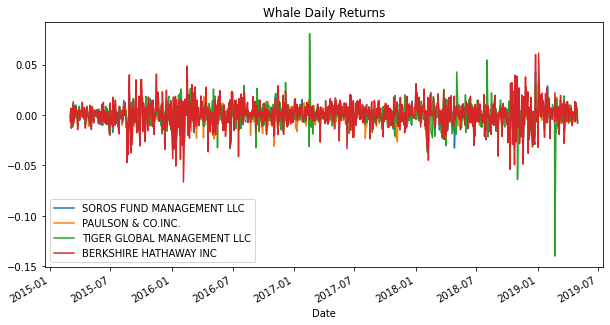

In [243]:
# to plot the whale portfolio
whale_daily_clean.plot(figsize=(10,5), title="Whale Daily Returns")

<AxesSubplot:title={'center':'Algorithmic Daily Returns'}, xlabel='Date'>

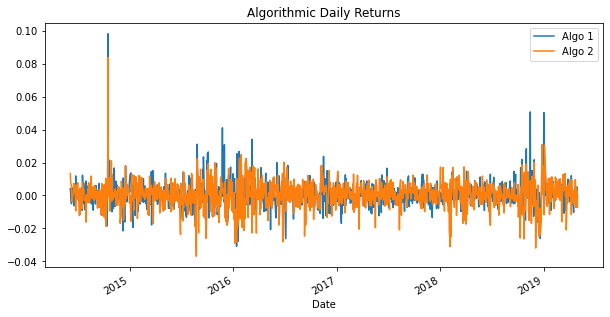

In [244]:
# Plot dairy return of the Algorithmic portfolio
algo_daily_clean.plot(figsize=(10,5), title="Algorithmic Daily Returns")

<AxesSubplot:title={'center':'S&P500 Daily Returns'}, xlabel='Date'>

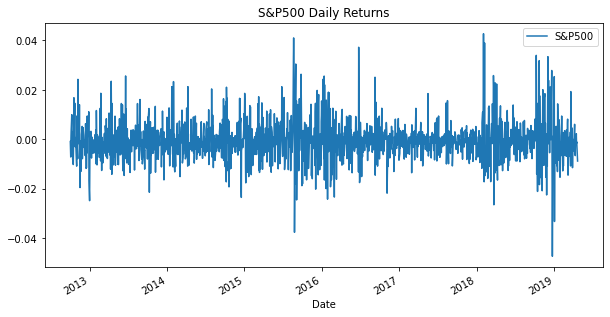

In [22]:
# Plot dairy return of S&P500
sp500_final.plot(figsize=(10,5), title="S&P500 Daily Returns")

#### Calculate and Plot cumulative returns.

In [245]:
# whale cumulative returns
whale_cumulative = (1 + whale_daily_clean).cumprod() -1
whale_cumulative.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383
2015-03-05,0.004981,0.002314,-0.000681,0.004327
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466


<AxesSubplot:title={'center':'Whale Cumulative Returns'}, xlabel='Date'>

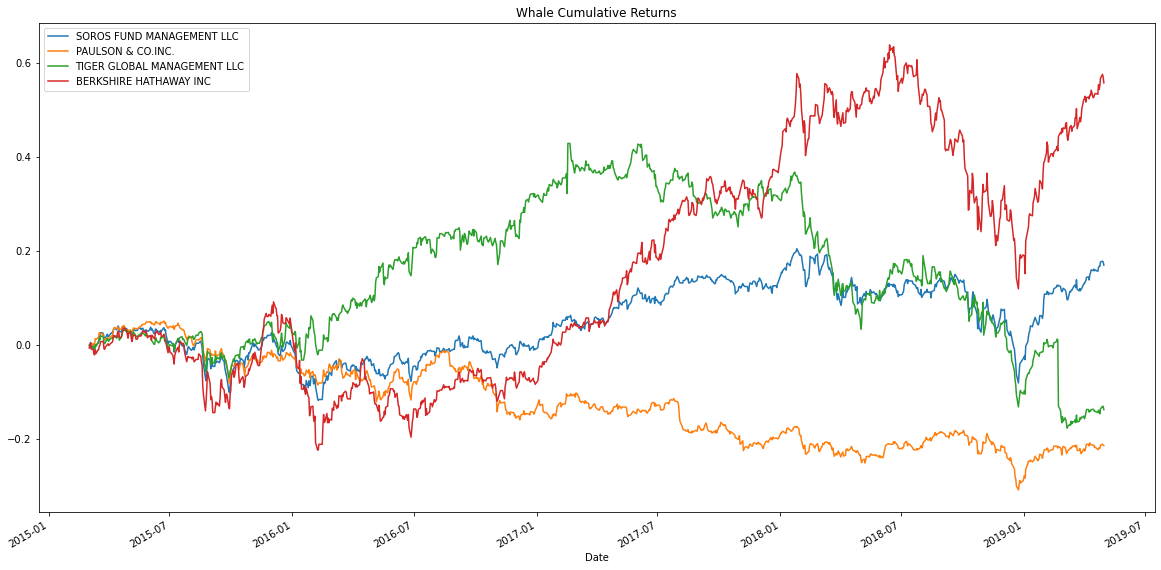

In [24]:
# Plot Whale'scumulative returns
whale_cumulative.plot(figsize=(20, 10), title = "Whale Cumulative Returns")

In [246]:
# Algorithmic's cumulative returns
algo_cumulative = (1 + algo_daily_clean).cumprod() -1
algo_cumulative.head()

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.005927,0.021679
2014-06-09,0.000885,0.027470
2014-06-10,0.005295,0.026714
2014-06-11,0.010081,0.022852


<AxesSubplot:title={'center':'Algorithmic Cumulative Returns'}, xlabel='Date'>

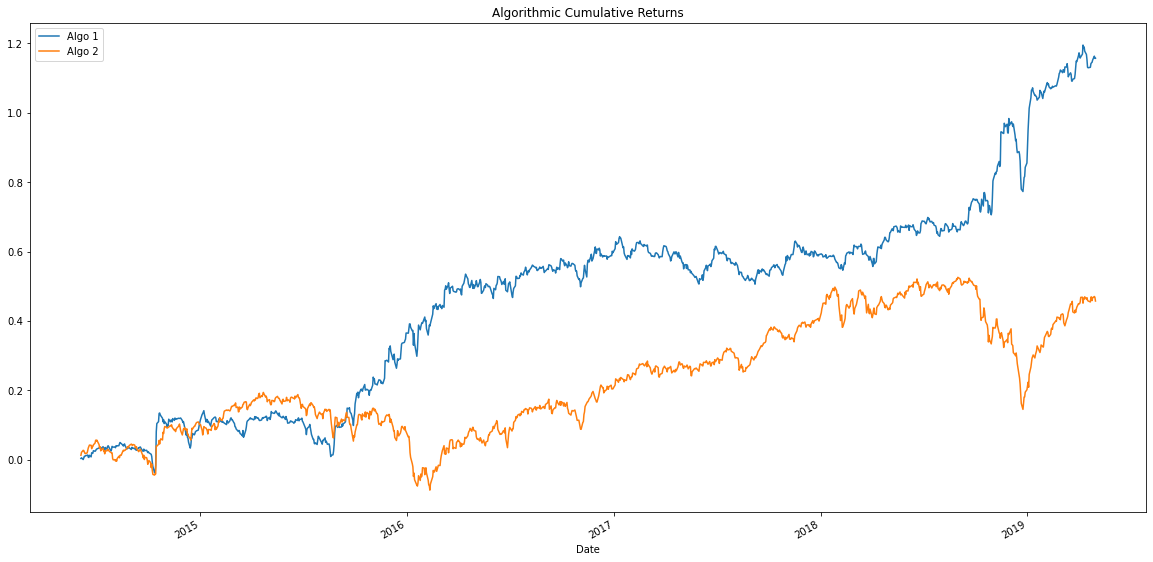

In [26]:
# Plot Algorithmic's cumulative returns
algo_cumulative.plot(figsize=(20, 10), title = "Algorithmic Cumulative Returns")

In [247]:
# S&P500 cumulative returns
sp500_cumulative = (1 + sp500_final).cumprod() -1
sp500_cumulative.head()

,S&P500
Date,
2019-04-22,-0.008764
2019-04-18,-0.009766
2019-04-17,-0.011327
2019-04-16,-0.009074
2019-04-15,-0.009578


<AxesSubplot:title={'center':'S&P500 Cumulative Returns'}, xlabel='Date'>

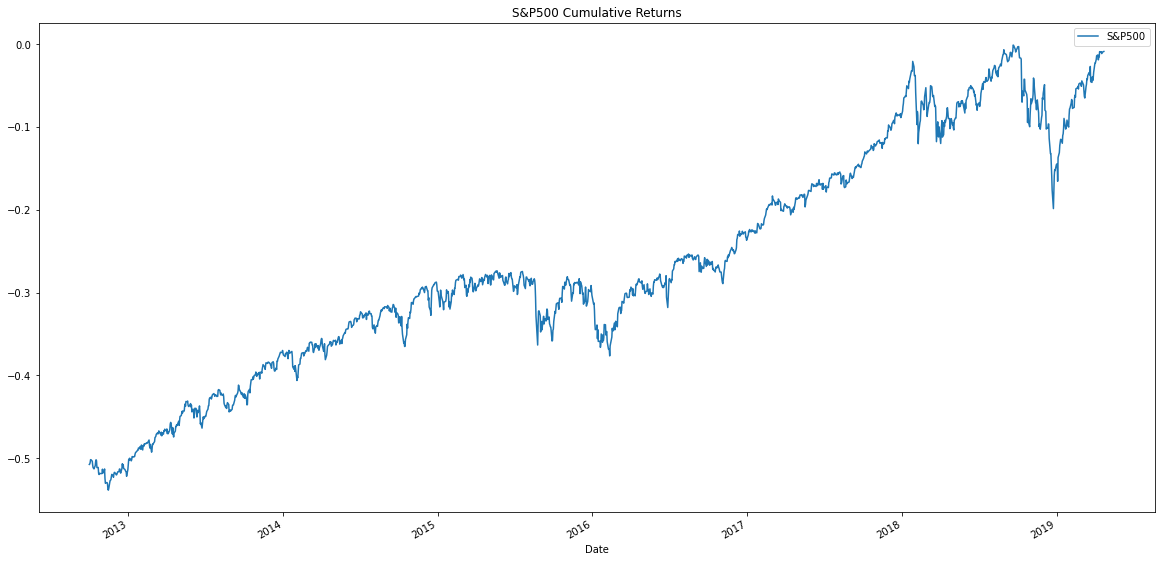

In [248]:
# Plot S&P500 cumulative returns
sp500_cumulative.plot(figsize=(20, 10), title = "S&P500 Cumulative Returns")

In [249]:
# Join cumulative returns of Whale, Algorithmic, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_cumulative=pd.concat([whale_cumulative, algo_cumulative, sp500_cumulative], axis='columns', join='inner')
combined_cumulative.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,0.104979,0.156329,-0.281524
2015-03-04,0.000962,-0.001755,-0.003028,-0.002383,0.095489,0.159122,-0.284677
2015-03-05,0.004981,0.002314,-0.000681,0.004327,0.094442,0.164134,-0.283821
2015-03-06,-0.002963,-0.001269,-0.009156,-0.008828,0.089018,0.150792,-0.293972
2015-03-09,-0.002383,0.002951,-0.003367,-0.010466,0.083086,0.152292,-0.291187


<AxesSubplot:title={'center':'Cumulative Returns of all Portfolios'}, xlabel='Date'>

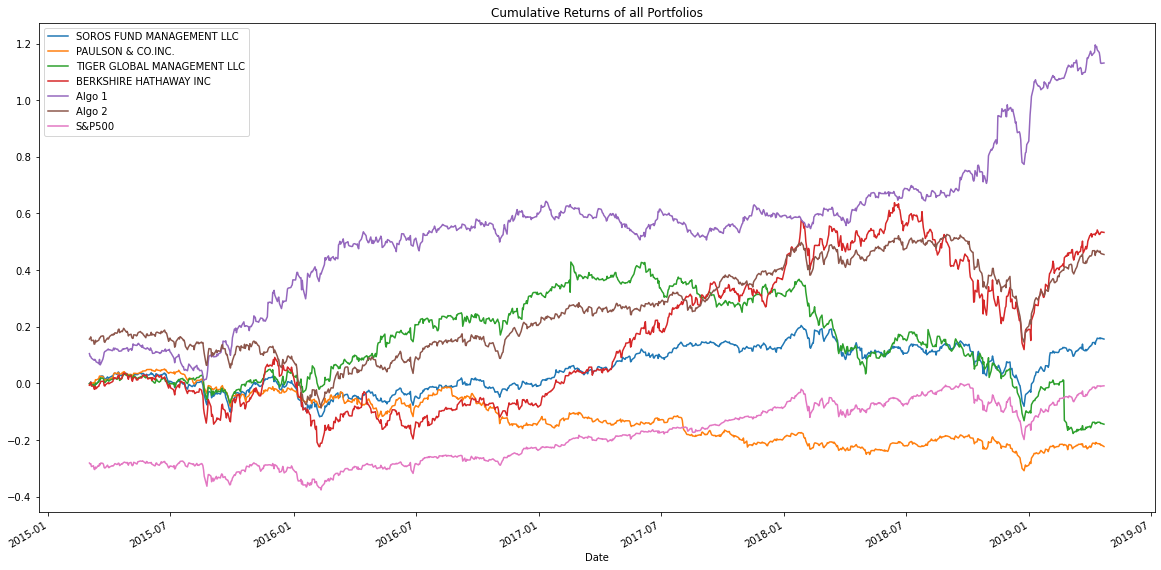

In [30]:
# Plot combined cumulative returns
combined_cumulative.plot(figsize=(20, 10), title = "Cumulative Returns of all Portfolios")

In [31]:
# to find the begining date in the dataframe
beg_date = combined_cumulative.iloc[1:2,]
print(beg_date)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-04                   0.000962           -0.001755   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-04                    -0.003028               -0.002383  0.095489   

              Algo 2    S&P500  
Date                            
2015-03-04  0.159122 -0.284677  


In [32]:
# to find the most recent date (last date) in the dataframe
rows = combined_cumulative.iloc[-1:]
print(rows)

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-04-22                    0.15628           -0.223061   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2019-04-22                    -0.144348                0.533046  1.131361   

              Algo 2    S&P500  
Date                            
2019-04-22  0.455062 -0.008764  


In [33]:
# Conclusion: Algo 1, Algo 2, Berkshire Hathaway, and Soros Fund Management outperformed 
# the S&P500 for the period from March 4, 2015 to April 22, 2019

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


In [254]:
# Box plot to visually show risk
# Calculate daily standard deviations
whale_std = whale_daily_clean.std()
whale_std

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64

In [255]:
algo_std = algo_daily_clean.std()
algo_std

Algo 1    0.007988
Algo 2    0.008466
dtype: float64

In [256]:
sp500_std= sp500_final.std()
sp500_std

S&P500    0.008135
dtype: float64

<AxesSubplot:>

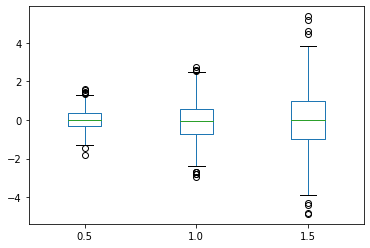

In [257]:
whale_std = np.random.normal(scale=0.5, size=1000)
algo_std = np.random.normal(scale=1.0, size=1000)
sp500_std = np.random.normal(scale=1.5, size=1000)

portfolio_std = pd.DataFrame({"0.5": whale_std, "1.0": algo_std, "1.5":sp500_std})
portfolio_std.plot.box()

### Calculate Standard Deviations

In [258]:
# Calculate the daily standard deviations of all portfolios
whale_std = whale_daily_clean.std()
print(whale_std)
algo_std = algo_daily_clean.std()
print(algo_std)

SOROS FUND MANAGEMENT LLC      0.007842
PAULSON & CO.INC.              0.006977
TIGER GLOBAL MANAGEMENT LLC    0.010824
BERKSHIRE HATHAWAY INC         0.012831
dtype: float64
Algo 1    0.007988
Algo 2    0.008466
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [259]:
# Calculate the daily standard deviation of S&P 500
sp500_std= sp500_final.std()
sp500_std

S&P500    0.008135
dtype: float64

In [260]:
# Determine which portfolios are riskier than the S&P 500
    # Based on the dairly standard diviation, Algo 2, TIGER GLOBAL MANAGEMENT LLC  and BERKSHIRE HATHAWAY INC are risker than S&P 500.

### Calculate the Annualized Standard Deviation

In [261]:
# Calculate the annualized standard deviation (252 trading days) of whale
whale_daily_std = whale_daily_clean.std()
whale_annual_std = whale_std*np.sqrt(252)
whale_annual_std


SOROS FUND MANAGEMENT LLC      0.124487
PAULSON & CO.INC.              0.110754
TIGER GLOBAL MANAGEMENT LLC    0.171830
BERKSHIRE HATHAWAY INC         0.203682
dtype: float64

In [262]:
# Calculate the annualized standard deviation (252 trading days) of Algorithmic
algo_daily_std = algo_daily_clean.std()
algo_annaul_std=algo_daily_std*np.sqrt(252)
algo_annaul_std


Algo 1    0.126801
Algo 2    0.134401
dtype: float64

In [43]:
# Calculate the annualized standard deviation (252 trading days) of S&P500
sp500_daily_std= sp500_final.std()
sp500_annaul_std=sp500_daily_std*np.sqrt(252)
sp500_annaul_std

S&P500    0.129133
dtype: float64

<AxesSubplot:ylabel='Frequency'>

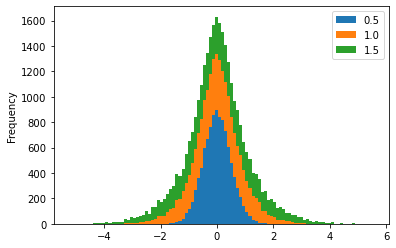

In [263]:
whale_annual_std_plot= np.random.normal(scale=0.5, size=10000)
algo_annaul_std_plot= np.random.normal(scale=1.0, size=10000)
sp500_annaul_std_plot = np.random.normal(scale=1.5, size=10000)

portfolio_annual_std = pd.DataFrame({
    "0.5": whale_annual_std_plot,
    "1.0": algo_annaul_std_plot,
    "1.5": sp500_annaul_std_plot
})

portfolio_annual_std.plot.hist(stacked=True, bins=100)


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [264]:
# Whale: calculate the rolling standard deviation by using a 21-day window
rolling_whale_std = whale_daily_clean.rolling(window = 21).std()
rolling_whale_std.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,NaN,NaN,NaN,NaN
2015-03-04,NaN,NaN,NaN,NaN
2015-03-05,NaN,NaN,NaN,NaN
2015-03-06,NaN,NaN,NaN,NaN
2015-03-09,NaN,NaN,NaN,NaN


<AxesSubplot:title={'center':'Whale Rolling 21-day standard deviation'}, xlabel='Date'>

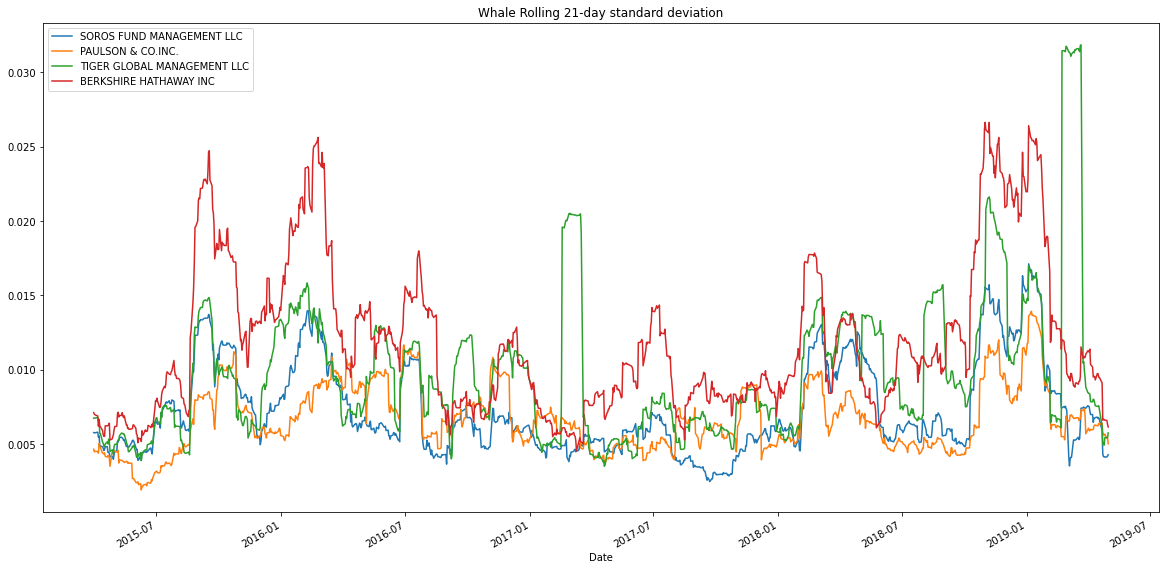

In [265]:
# Plot the rolling standard deviation for Whale
rolling_whale_std.plot(figsize=(20, 10), title='Whale Rolling 21-day standard deviation')

In [266]:
# Algorithmic: calculate the rolling standard deviation by using a 21-day window
rolling_algo_std = algo_daily_clean.rolling(window = 21).std()
rolling_algo_std.head()

,Algo 1,Algo 2
Date,,
2014-06-05,NaN,NaN
2014-06-06,NaN,NaN
2014-06-09,NaN,NaN
2014-06-10,NaN,NaN
2014-06-11,NaN,NaN


<AxesSubplot:title={'center':'Algorithmic Rolling 21-day standard deviation'}, xlabel='Date'>

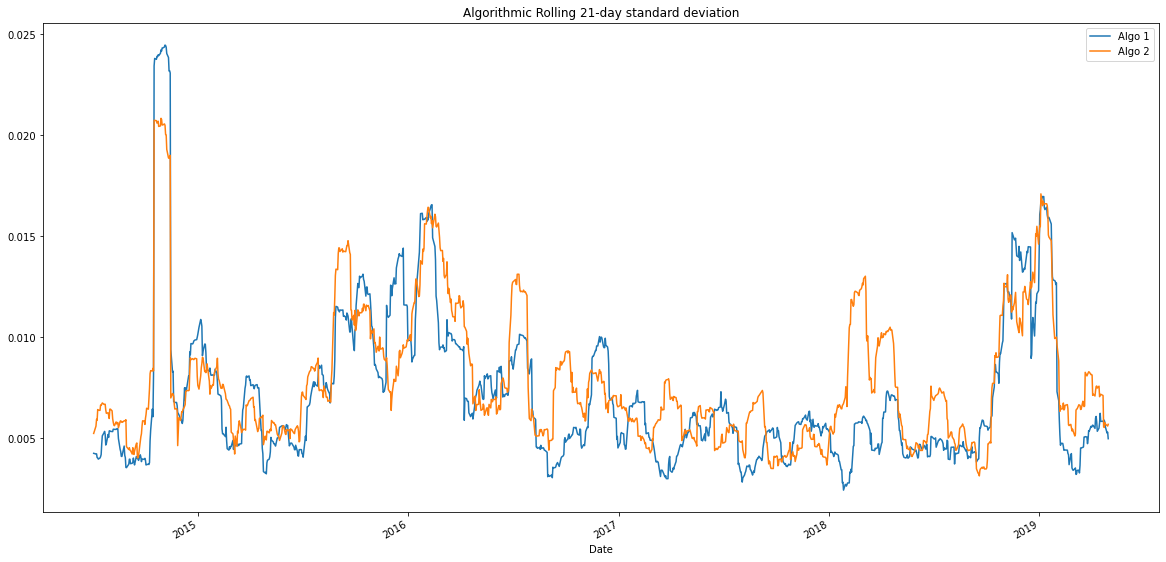

In [267]:
# Plot the rolling standard deviation for Algo
rolling_algo_std.plot(figsize=(20, 10), title='Algorithmic Rolling 21-day standard deviation')

In [268]:
# S&P 500: calculate the rolling standard deviation by using a 21-day window
rolling_sp500_std = sp500_final.rolling(window = 21).std()
rolling_sp500_std.head()

,S&P500
Date,
2019-04-22,NaN
2019-04-18,NaN
2019-04-17,NaN
2019-04-16,NaN
2019-04-15,NaN


<AxesSubplot:title={'center':'Algorithmic Rolling 21-day standard deviation'}, xlabel='Date'>

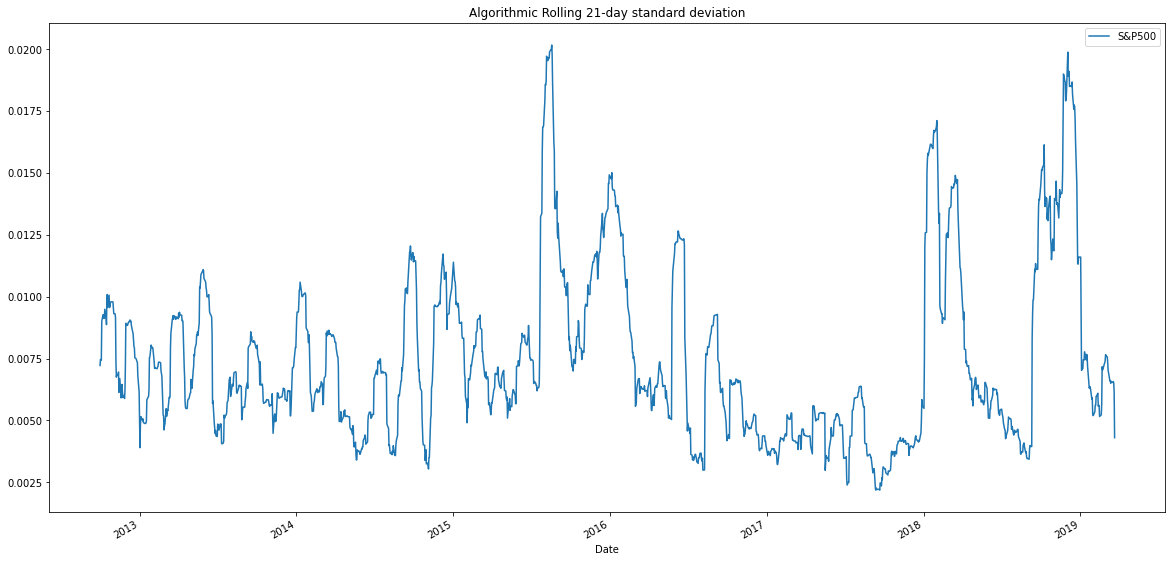

In [269]:
# Plot the rolling standard deviation for S&P 500
rolling_sp500_std.plot(figsize=(20, 10), title='Algorithmic Rolling 21-day standard deviation')

### Calculate and plot the correlation

In [270]:
# Calculate the correlation
correlation_daily_returns =combined_df.corr()
correlation_daily_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963


<AxesSubplot:>

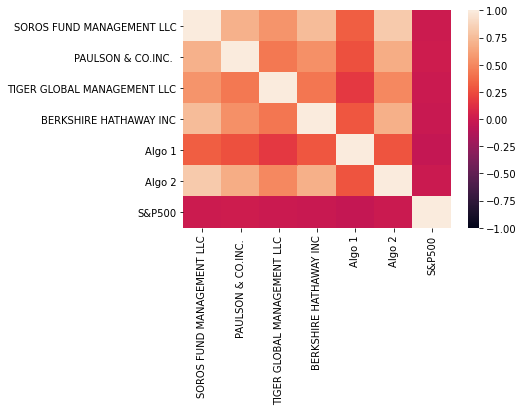

In [271]:
# Display de correlation matrix
sns.heatmap(correlation_daily_returns, vmin=-1, vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [272]:
# Calculate covariance of a single portfolio
covariance_soros = combined_df['SOROS FUND MANAGEMENT LLC'].cov(combined_df['S&P500'])
covariance_soros

3.889726983063765e-08

In [273]:
# Calculate variance of S&P 500
sp500_variance = combined_df['S&P500'].var()
sp500_variance

7.373467552840441e-05

In [274]:
# Computing beta
soros_beta = covariance_soros/sp500_variance
soros_beta

0.0005275302230855206

In [276]:
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [277]:
# Rename a column of combined_df 
renamed_combined_df=combined_df.rename(columns={'SOROS FUND MANAGEMENT LLC': 'SOROS'})
renamed_combined_df.head()

,SOROS,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [279]:
soros_sp500_df = renamed_combined_df.loc[:,['SOROS', 'S&P500']]
soros_sp500_df.head()

,SOROS,S&P500
Date,,
2015-03-03,-0.001266,0.004408
2015-03-04,0.002230,-0.001195
2015-03-05,0.004016,0.014378
2015-03-06,-0.007905,-0.003929
2015-03-09,0.000582,0.017254


In [280]:
# Calculate 30-day rolling covariance of Soros to SP500
rolling_covariance = soros_sp500_df['SOROS'].rolling(window=30).cov(soros_sp500_df['S&P500'])
rolling_covariance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000008
2019-04-16    0.000009
2019-04-17    0.000012
2019-04-18    0.000014
2019-04-22    0.000014
Length: 1042, dtype: float64

In [60]:
# Calculate 30-day rolling variance of S&P 500
rolling_variance = soros_sp500_df['S&P500'].rolling(window=30).var()
rolling_variance

Date
2015-03-03         NaN
2015-03-04         NaN
2015-03-05         NaN
2015-03-06         NaN
2015-03-09         NaN
                ...   
2019-04-15    0.000043
2019-04-16    0.000041
2019-04-17    0.000038
2019-04-18    0.000037
2019-04-22    0.000034
Name: S&P500, Length: 1042, dtype: float64

<AxesSubplot:title={'center':'Rolling 30-Day Beta of Soros'}>

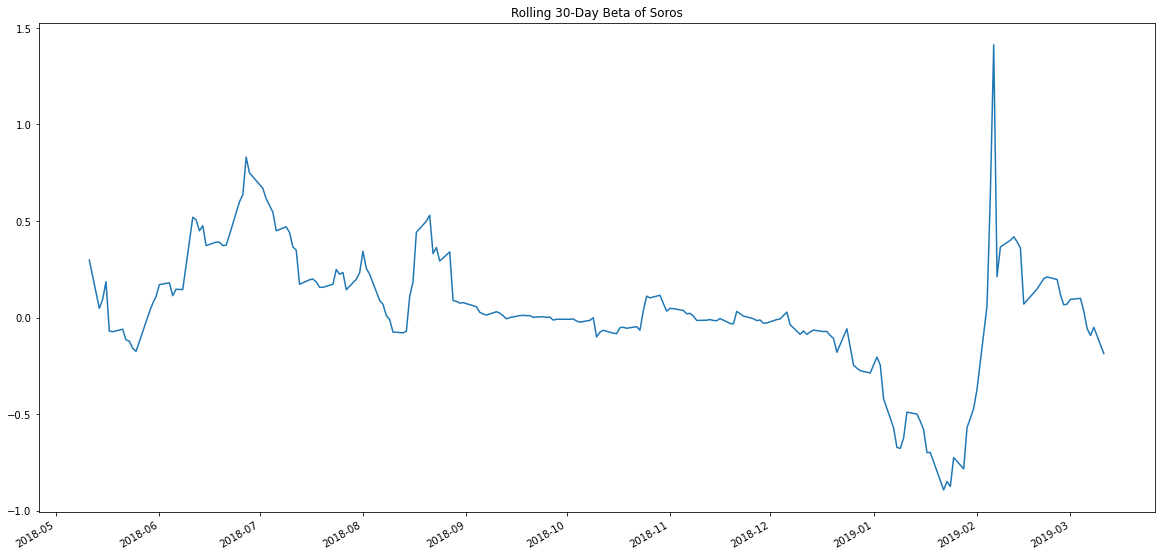

In [281]:
# Calculate 30-day rolling beta of Soros and plot the deta
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 30-Day Beta of Soros')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [283]:
# Use `ewm` to calculate the 30 days rolling window for Soros
ewm_soros=soros_sp500_df["SOROS"].ewm(span=30, adjust=False).mean()
ewm_soros.head()

Date
2015-03-03   -0.001266
2015-03-04   -0.001040
2015-03-05   -0.000714
2015-03-06   -0.001178
2015-03-09   -0.001064
Name: SOROS, dtype: float64

<AxesSubplot:title={'center':'Exponentilaly Weited 30-Day daily returns of Soros'}, xlabel='Date'>

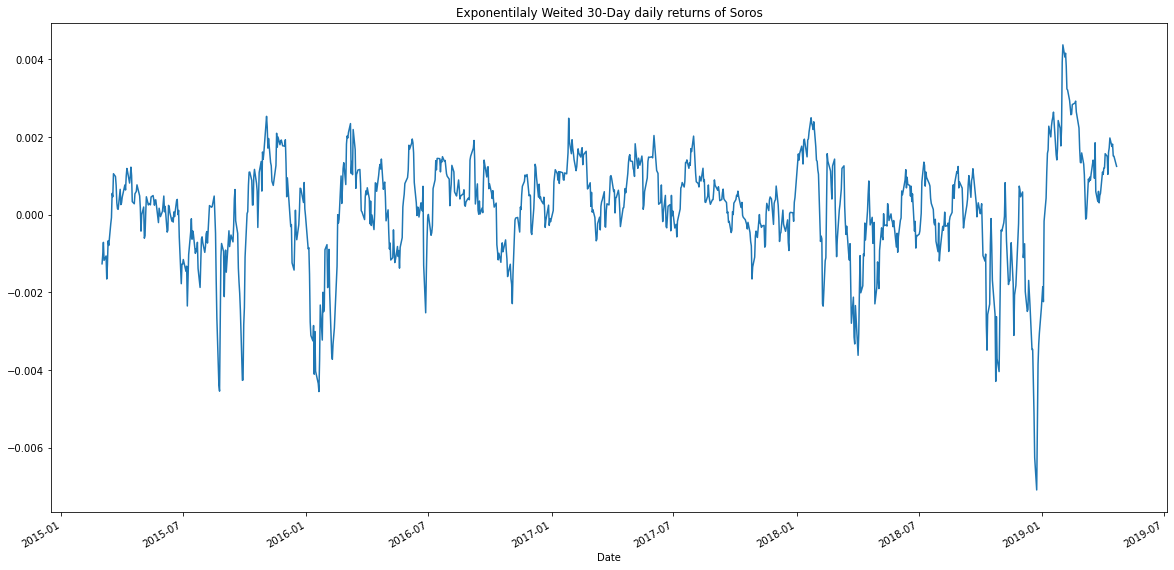

In [284]:
# Plot Soro's EWM result
ewm_soros.plot(figsize=(20, 10), title='Exponentilaly Weited 30-Day daily returns of Soros')

In [285]:
# Use `ewm` to calculate the 30 days rolling window for S&P 500
ewm_sp500= soros_sp500_df["S&P500"].ewm(span=30, adjust=False).mean()
ewm_sp500.head()

Date
2015-03-03    0.004408
2015-03-04    0.004046
2015-03-05    0.004713
2015-03-06    0.004155
2015-03-09    0.005000
Name: S&P500, dtype: float64

<AxesSubplot:title={'center':'Exponentilaly Weited 30-Day daily returns of S&P 500'}, xlabel='Date'>

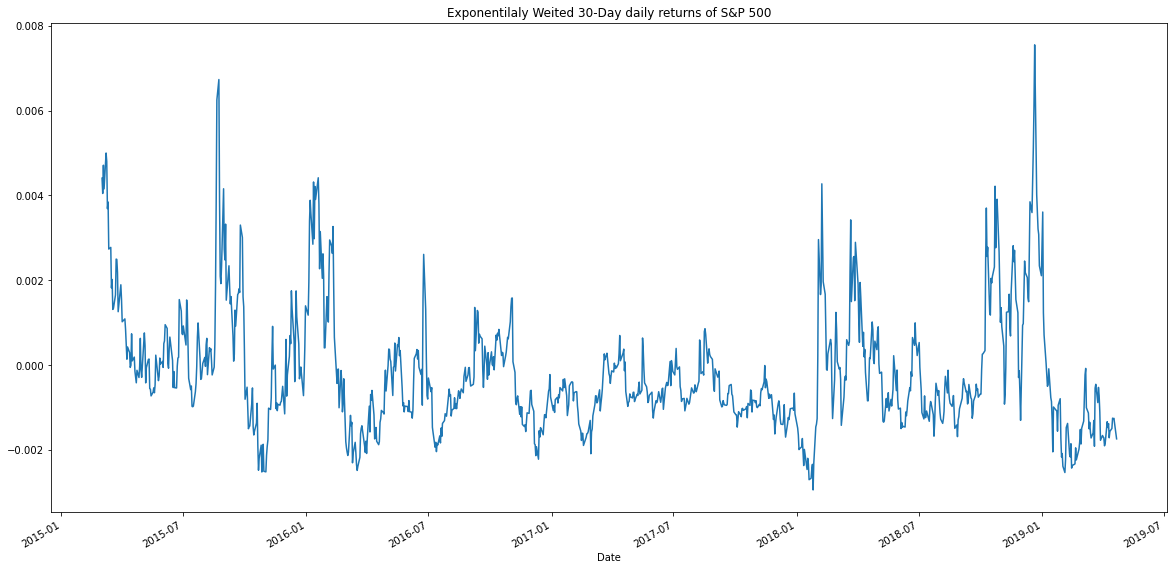

In [286]:
# Plot S&P 500 EWM result
ewm_sp500.plot(figsize=(20, 10), title='Exponentilaly Weited 30-Day daily returns of S&P 500')

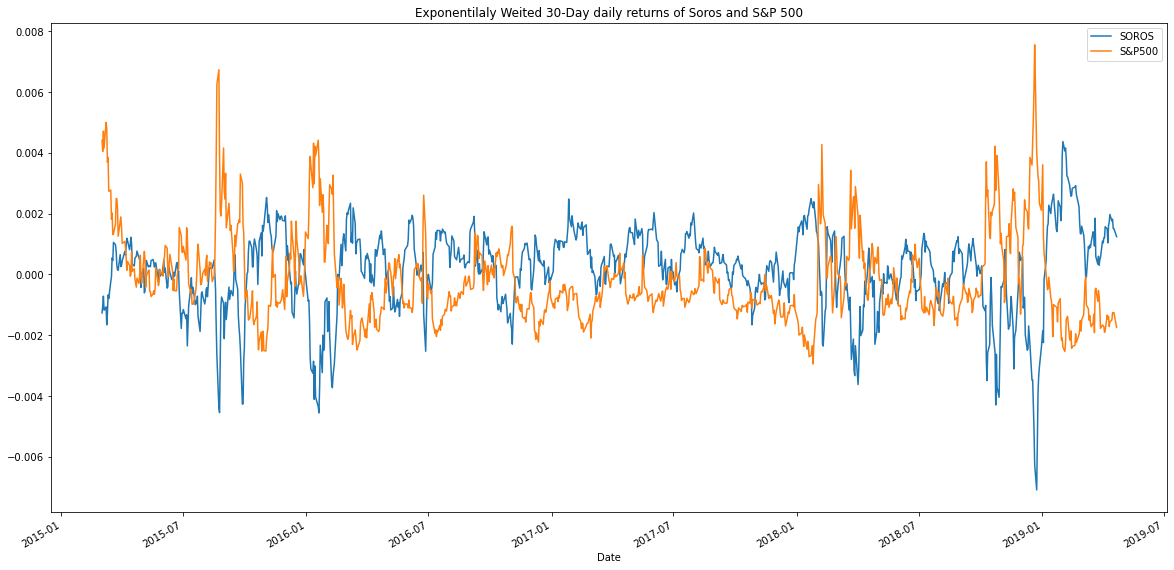

In [287]:
# Combine plots of Soros and S&P500 'ewm'
ax=ewm_soros.plot(figsize=(20, 10), legend=True)
ax=ewm_sp500.plot(figsize=(20, 10), title='Exponentilaly Weited 30-Day daily returns of Soros and S&P 500', legend=True)

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [288]:
# Annualized Sharpe Ratios
sharpe_ratio = ((combined_df.mean()-combined_df['S&P500'].mean()) *252)/(combined_df.std()*np.sqrt(252))
sharpe_ratio

SOROS FUND MANAGEMENT LLC      0.906838
PAULSON & CO.INC.              0.142411
TIGER GLOBAL MANAGEMENT LLC    0.278448
BERKSHIRE HATHAWAY INC         0.951436
Algo 1                         1.953767
Algo 2                         1.018189
S&P500                         0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

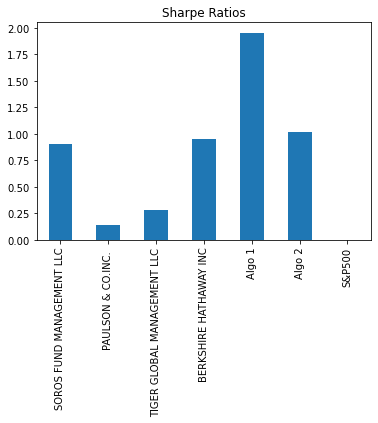

In [289]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar', title="Sharpe Ratios")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [290]:
# Reading data from 1st stock
# set the file path
goog_path = Path("Resources/goog_historical.csv")
# create a Pandas dataframe from a csv file
google_price = pd.read_csv(goog_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
google_price.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [427]:
google_drop_column=google_price.drop(columns='Symbol').rename(columns={'NOCP':'Google'})
google_drop_column.head()

,Google
Trade DATE,
2019-05-09,1162.38
2019-05-08,1166.27
2019-05-07,1174.10
2019-05-06,1189.39
2019-05-03,1185.40


In [517]:
# Re-order the dataframe
google_df=google_drop_column.sort_index(ascending=True)
google_df

,Google
Trade DATE,
2018-05-11,1098.26
2018-05-14,1100.20
2018-05-15,1079.23
2018-05-16,1081.77
2018-05-17,1078.59
...,...
2019-05-03,1185.40
2019-05-06,1189.39
2019-05-07,1174.10


In [292]:
# Reading data from 2nd stock
# set the file path
aapl_path = Path("Resources/aapl_historical.csv")
# create a Pandas dataframe from a csv file
aapl_price = pd.read_csv(aapl_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
aapl_price.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [429]:
aapl_drop_column=aapl_price.drop(columns='Symbol').rename(columns={'NOCP':'Apple'})
aapl_drop_column.head()

,Apple
Trade DATE,
2019-05-09,200.72
2019-05-08,202.90
2019-05-07,202.86
2019-05-06,208.48
2019-05-03,211.75


In [518]:
# Re-order the dataframe
aapl_df=aapl_drop_column.sort_index(ascending=True)
aapl_df

,Apple
Trade DATE,
2018-05-11,188.59
2018-05-14,188.15
2018-05-15,186.44
2018-05-16,188.18
2018-05-17,186.99
...,...
2019-05-03,211.75
2019-05-06,208.48
2019-05-07,202.86


In [444]:
# Reading data from 3rd stock
# set the file path
cost_path = Path("Resources/cost_historical.csv")
# create a Pandas dataframe from a csv file
cost_price = pd.read_csv(cost_path, index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
cost_price.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [445]:
cost_drop_column=cost_price.drop(columns='Symbol').rename(columns={'NOCP':'Costco'})
cost_drop_column.head()

,Costco
Trade DATE,
2019-05-09,243.47
2019-05-08,241.34
2019-05-07,240.18
2019-05-06,244.23
2019-05-03,244.62


In [519]:
# Re-order the dataframe
cost_df=cost_drop_column.sort_index(ascending=True)
cost_df

,Costco
Trade DATE,
2018-05-11,195.76
2018-05-14,195.88
2018-05-15,195.48
2018-05-16,198.71
2018-05-17,199.60
...,...
2019-05-03,244.62
2019-05-06,244.23
2019-05-07,240.18


In [520]:
# Combine all stocks in a single DataFrame
combined_prices=pd.concat([google_df, aapl_df, cost_df], axis='columns', join='inner')
combined_prices.head()

,Google,Apple,Costco
Trade DATE,,,
2018-05-11,1098.26,188.59,195.76
2018-05-14,1100.20,188.15,195.88
2018-05-15,1079.23,186.44,195.48
2018-05-16,1081.77,188.18,198.71
2018-05-17,1078.59,186.99,199.60


<AxesSubplot:title={'center':'Closing Prices'}, xlabel='Trade DATE'>

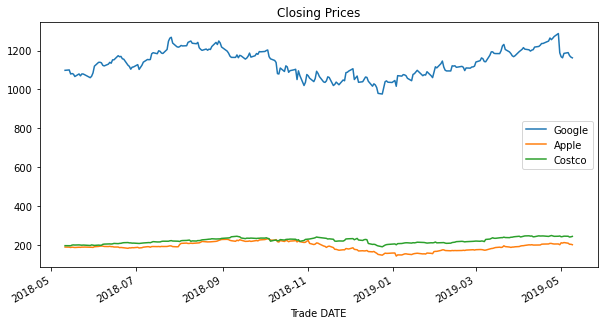

In [521]:
combined_prices.plot(figsize=(10, 5), title='Closing Prices')

In [522]:
# Calculate daily returns
daily_returns=combined_prices.pct_change()
daily_returns.head()

,Google,Apple,Costco
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479


In [523]:
# calculate the average of daily returns
daily_returns.mean()

Google    0.000366
Apple     0.000426
Costco    0.000964
dtype: float64

<AxesSubplot:title={'center':'daily_returns'}, xlabel='Trade DATE'>

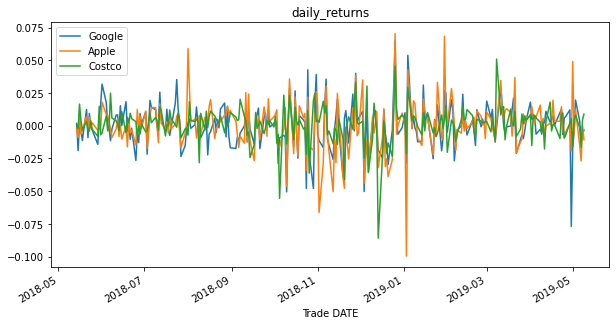

In [453]:
daily_returns.plot(figsize=(10,5), title='daily_returns')

In [524]:
# Calculate cumulative returns
mycumulative_returns=(1 + daily_returns.cumprod() - 1)
mycumulative_returns.head()

,Google,Apple,Costco
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,1.766431e-03,-2.333104e-03,6.129955e-04
2018-05-15,-3.366847e-05,2.120440e-05,-1.251778e-06
2018-05-16,-7.923974e-08,1.978956e-07,-2.068366e-08
2018-05-17,2.329352e-10,-1.251439e-09,-9.263978e-11


In [525]:
# Drop NAs
daily_returns_cln=daily_returns.dropna()

In [526]:
# Count number of NAs
daily_returns_cln.isnull().sum(axis = 0)

Google    0
Apple     0
Costco    0
dtype: int64

In [527]:
# Display sample data
daily_returns_cln.head()

,Google,Apple,Costco
Trade DATE,,,
2018-05-14,0.001766,-0.002333,0.000613
2018-05-15,-0.019060,-0.009088,-0.002042
2018-05-16,0.002354,0.009333,0.016523
2018-05-17,-0.002940,-0.006324,0.004479
2018-05-18,-0.011339,-0.003637,-0.003206


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [528]:
# Set weights
weights = [1/3, 1/3, 1/3]
# Calculate portfolio return
# Display sample data
weighted_portfolio_returns = daily_returns_cln.dot(weights)
weighted_portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

In [530]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns_weighted=pd.concat([daily_returns_cln, weighted_portfolio_returns], axis='columns', join='inner')
combined_returns_weighted.head()

,Google,Apple,Costco,0
Trade DATE,,,,
2018-05-14,0.001766,-0.002333,0.000613,0.000015
2018-05-15,-0.019060,-0.009088,-0.002042,-0.010064
2018-05-16,0.002354,0.009333,0.016523,0.009403
2018-05-17,-0.002940,-0.006324,0.004479,-0.001595
2018-05-18,-0.011339,-0.003637,-0.003206,-0.006061


In [531]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
dropan_returns_weighted=combined_returns_weighted.dropna()
dropan_returns_weighted.head()

,Google,Apple,Costco,0
Trade DATE,,,,
2018-05-14,0.001766,-0.002333,0.000613,0.000015
2018-05-15,-0.019060,-0.009088,-0.002042,-0.010064
2018-05-16,0.002354,0.009333,0.016523,0.009403
2018-05-17,-0.002940,-0.006324,0.004479,-0.001595
2018-05-18,-0.011339,-0.003637,-0.003206,-0.006061


In [532]:
# Count NAs
dropan_returns_weighted.isnull().sum(axis = 0)

Google    0
Apple     0
Costco    0
0         0
dtype: int64

In [533]:
named_returns_weighted=dropan_returns_weighted.rename(columns = {0: "Weighted"})
named_returns_weighted.head()

,Google,Apple,Costco,Weighted
Trade DATE,,,,
2018-05-14,0.001766,-0.002333,0.000613,0.000015
2018-05-15,-0.019060,-0.009088,-0.002042,-0.010064
2018-05-16,0.002354,0.009333,0.016523,0.009403
2018-05-17,-0.002940,-0.006324,0.004479,-0.001595
2018-05-18,-0.011339,-0.003637,-0.003206,-0.006061


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [534]:
# Calculate the annualized `std` standard diviation of closing prices
daily_std = combined_prices.std()
daily_std

Google    67.846776
Apple     21.436472
Costco    14.434399
dtype: float64

In [535]:
# Calculate the annualized `std` (252 trading days) of closing prices
annual_std = daily_std*np.sqrt(252)
annual_std

Google    1077.034185
Apple      340.293451
Costco     229.138982
dtype: float64

### Calculate and plot rolling `std` with 21-day window

In [536]:
# Calculate 21 days rolling standard deviation of closing prices
rolling_std = combined_prices.rolling(window = 21).std()
rolling_std

,Google,Apple,Costco
Trade DATE,,,
2018-05-11,NaN,NaN,NaN
2018-05-14,NaN,NaN,NaN
2018-05-15,NaN,NaN,NaN
2018-05-16,NaN,NaN,NaN
2018-05-17,NaN,NaN,NaN
...,...,...,...
2019-05-03,34.267013,4.492921,1.723721
2019-05-06,34.983925,4.325365,1.725582
2019-05-07,36.353372,4.063099,1.961407


<AxesSubplot:title={'center':'Rolling 21 days standared diviation'}, xlabel='Trade DATE'>

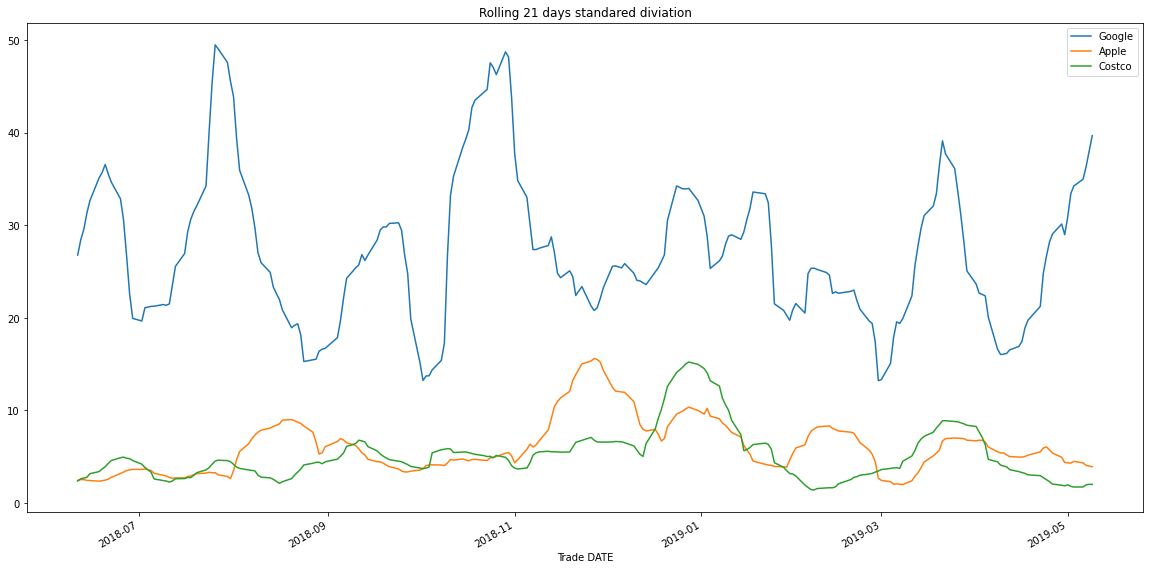

In [537]:
# Plot rolling standard deviation
rolling_std.plot(figsize=(20, 10), title='Rolling 21 days standared diviation')

### Calculate and plot the correlation

In [538]:
# Calculate and plot the correlation
rolling_corr = named_returns_weighted.corr()
rolling_corr

,Google,Apple,Costco,Weighted
Google,1.000000,0.655007,0.385145,0.853984
Apple,0.655007,1.000000,0.413546,0.881676
Costco,0.385145,0.413546,1.000000,0.687446
Weighted,0.853984,0.881676,0.687446,1.000000


<AxesSubplot:>

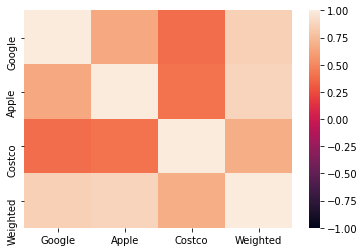

In [539]:
# Plot the correlation
sns.heatmap(rolling_corr, vmin=-1, vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [542]:
# Combine daily returns of portfolio and S&P 500
mine_sp500 = pd.concat([named_returns_weighted, sp500_final], axis='columns', join='inner')
mine_sp500.head()

,Google,Apple,Costco,Weighted,S&P500
2018-05-14,0.001766,-0.002333,0.000613,0.000015,0.006889
2018-05-15,-0.019060,-0.009088,-0.002042,-0.010064,-0.004044
2018-05-16,0.002354,0.009333,0.016523,0.009403,0.000857
2018-05-17,-0.002940,-0.006324,0.004479,-0.001595,0.002639
2018-05-18,-0.011339,-0.003637,-0.003206,-0.006061,-0.007333


In [541]:
# Calcluate the avearage daily returns of each columns
mine_sp500.mean()

Google      0.000674
Apple       0.000520
Costco      0.001014
Weighted    0.000736
S&P500     -0.000259
dtype: float64

In [544]:
# Calculate and plot Beta
# Calculate 60-day rolling covariance of my portfolio to SP500
rolling_covariance_mine = mine_sp500['Weighted'].rolling(window=60).cov(mine_sp500['S&P500'])
rolling_covariance_mine

2018-05-14             NaN
2018-05-15             NaN
2018-05-16             NaN
2018-05-17             NaN
2018-05-18             NaN
                  ...     
2019-04-15    2.359313e-06
2019-04-16    8.261192e-07
2019-04-17    6.125529e-07
2019-04-18    5.990182e-07
2019-04-22   -2.201289e-07
Length: 236, dtype: float64

In [545]:
# Calculate 60-day rolling variance of S&P 500
rolling_variance_mine=  mine_sp500['S&P500'].rolling(window=30).var()
rolling_variance_mine

2018-05-14         NaN
2018-05-15         NaN
2018-05-16         NaN
2018-05-17         NaN
2018-05-18         NaN
                ...   
2019-04-15    0.000043
2019-04-16    0.000041
2019-04-17    0.000038
2019-04-18    0.000037
2019-04-22    0.000034
Name: S&P500, Length: 236, dtype: float64

<AxesSubplot:title={'center':'Rolling 60-Day Beta of My Portfolio'}>

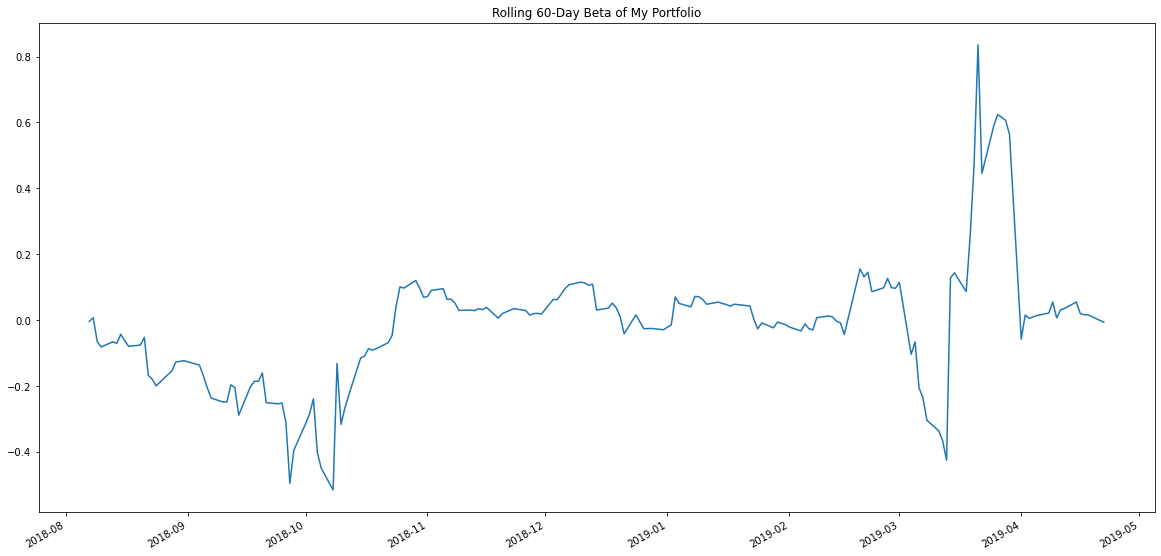

In [546]:
# Calculate 60-day rolling beta of my portfolio and plot the deta
rolling_beta_mine = rolling_covariance_mine / rolling_variance_mine
rolling_beta_mine.plot(figsize=(20, 10), title='Rolling 60-Day Beta of My Portfolio')

In [547]:
# find the max value of beta
maxbeta=rolling_beta_mine.max()
print(maxbeta)

0.8354332941057216


In [548]:
# find the minimum value of beta
minbeta=rolling_beta_mine.min()
print(minbeta)

-0.5155411784841711


In [549]:
# find the average value of beta
meanbeta=rolling_beta_mine.mean()
print(meanbeta)

-0.01694319638497596


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [550]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratio_mine = ((mine_sp500.mean()-mine_sp500['S&P500'].mean()) *252)/(mine_sp500.std()*np.sqrt(252))
sharpe_ratio_mine

Google      0.918811
Apple       0.660023
Costco      1.510432
Weighted    1.184275
S&P500      0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios of My Portfolio'}>

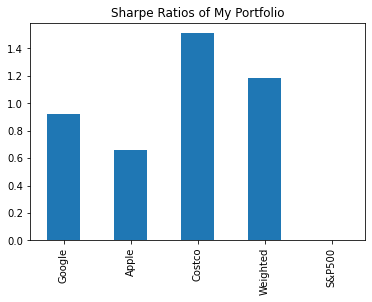

In [551]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio_mine.plot(kind='bar', title="Sharpe Ratios of My Portfolio")

In [553]:
### How does your portfolio do?

# Write your answer here!

In [554]:
# My portfolio is performing better than S&P 500.
# The sharpe ratio of the weighted average of my portfolio is 1.184275 which indicates that
# my portfolio generates higher returns with low volatility comparing to S&P 500.
# However, the average 60day rolling beta is -0.01694, which is close to 0.
# It implies that my portfolio might have an inverse relationship or no-relationship with the benchmark.
# As I prefer having the portfolio to align with the movement of S&P 500, I would consider to diversify the portfolio.  
